In [1]:
#The main purpose of this notebook is to get the points of the polygons

In [2]:
#Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from osgeo import gdal
import rioxarray as rxr

In [4]:
shp_file="C:\\Summer2022\\Marginal-Land-Classification\\Palakkad_Supervised_Landsat\\Data_Preprocessing\\Palakkad_training_shp.shp"

In [5]:
shp_ds=gpd.read_file(shp_file)

In [6]:
shp_ds

,OID_,Name,FolderPath,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,geometry
0,0,St1,Shapefiles_Palakkad.kmz/Shapefiles,0,0,0.0,-1,0,None,None,0.002974,4.866600e-07,"POLYGON Z ((76.64307 10.78823 0.00000, 76.6427..."
1,0,St2,Shapefiles_Palakkad.kmz/Shapefiles,0,0,0.0,-1,0,None,None,0.001681,1.746305e-07,"POLYGON Z ((76.64757 10.78760 0.00000, 76.6476..."
2,0,St3,Shapefiles_Palakkad.kmz/Shapefiles,0,0,0.0,-1,0,None,None,0.001720,1.386187e-07,"POLYGON Z ((76.64098 10.77907 0.00000, 76.6411..."
3,0,St4,Shapefiles_Palakkad.kmz/Shapefiles,0,0,0.0,-1,0,None,None,0.006752,7.587605e-07,"POLYGON Z ((76.64527 10.77772 0.00000, 76.6452..."
4,0,St5,Shapefiles_Palakkad.kmz/Shapefiles,0,0,0.0,-1,0,None,None,0.003190,4.005603e-07,"POLYGON Z ((76.64123 10.77975 0.00000, 76.6414..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,Vg16,Shapefiles_Palakkad.kmz/Shapefiles,0,0,0.0,-1,0,None,None,0.001165,6.110653e-08,"POLYGON Z ((76.71299 10.78113 0.00000, 76.7129..."
99,0,Vg17,Shapefiles_Palakkad.kmz/Shapefiles,0,0,0.0,-1,0,None,None,0.006994,2.006928e-06,"POLYGON Z ((76.71583 10.70537 0.00000, 76.7158..."
100,0,Vg18,Shapefiles_Palakkad.kmz/Shapefiles,0,0,0.0,-1,0,None,None,0.001806,1.891903e-07,"POLYGON Z ((76.64702 10.78369 0.00000, 76.6469..."
101,0,Vg19,Shapefiles_Palakkad.kmz/Shapefiles,0,0,0.0,-1,0,None,None,0.004446,6.433545e-07,"POLYGON Z ((76.69406 10.74895 0.00000, 76.6939..."


In [7]:
#Extracting the coordinates from the shapefile

In [8]:
shp_ds = shp_ds.set_crs("EPSG:4326",allow_override=True )

In [9]:
inp_geom=shp_ds.geometry.values

In [10]:
from shapely.geometry import Polygon, mapping
shp_coords=[]
for i in inp_geom:
    shp_coords.append(mapping(i))
shp_c=[]
for i in shp_coords:
    shp_c.append(list(i['coordinates']))
for i in range(103):
    for j in range(len(shp_c[i])):
        shp_c[i][j] = list(shp_c[i][j])
        for k in range(len(shp_c[i][j])):
            shp_c[i][j][k] = list(shp_c[i][j][k])
for i in range(103):
    for j in range(len(shp_c[i])):
        for k in range(len(shp_c[i][j])):
            shp_c[i][j][k].remove(0.0)
shp_c

[[[[76.64307164300004, 10.788226620000046],
   [76.64277901900005, 10.78838195000003],
   [76.64298855100003, 10.788809429000025],
   [76.64307477100004, 10.788927469000043],
   [76.64321036300004, 10.788880423000023],
   [76.64330357200004, 10.789071259000025],
   [76.64374929400003, 10.78888747800005],
   [76.64359554700007, 10.788507878000075],
   [76.64339916200004, 10.788449721000063],
   [76.64336300100007, 10.78835177700006],
   [76.64333494800007, 10.78816123100006],
   [76.64307164300004, 10.788226620000046]]],
 [[[76.64757021700007, 10.787596412000028],
   [76.64761787800006, 10.787977845000057],
   [76.64809534300008, 10.787880577000067],
   [76.64799121700008, 10.787514773000055],
   [76.64757021700007, 10.787596412000028]]],
 [[[76.64098446600008, 10.779067832000067],
   [76.64117111600007, 10.779122803000064],
   [76.64116364900008, 10.779173546000038],
   [76.64114077500005, 10.779369620000068],
   [76.64123790400004, 10.77935419000005],
   [76.64133920900008, 10.7792799

In [11]:
len(shp_c)

103

In [12]:
our_ds=shp_ds[['Name','Shape_Leng','Shape_Area','geometry']]

In [13]:
our_ds

,Name,Shape_Leng,Shape_Area,geometry
0,St1,0.002974,4.866600e-07,"POLYGON Z ((76.64307 10.78823 0.00000, 76.6427..."
1,St2,0.001681,1.746305e-07,"POLYGON Z ((76.64757 10.78760 0.00000, 76.6476..."
2,St3,0.001720,1.386187e-07,"POLYGON Z ((76.64098 10.77907 0.00000, 76.6411..."
3,St4,0.006752,7.587605e-07,"POLYGON Z ((76.64527 10.77772 0.00000, 76.6452..."
4,St5,0.003190,4.005603e-07,"POLYGON Z ((76.64123 10.77975 0.00000, 76.6414..."
...,...,...,...,...
98,Vg16,0.001165,6.110653e-08,"POLYGON Z ((76.71299 10.78113 0.00000, 76.7129..."
99,Vg17,0.006994,2.006928e-06,"POLYGON Z ((76.71583 10.70537 0.00000, 76.7158..."
100,Vg18,0.001806,1.891903e-07,"POLYGON Z ((76.64702 10.78369 0.00000, 76.6469..."
101,Vg19,0.004446,6.433545e-07,"POLYGON Z ((76.69406 10.74895 0.00000, 76.6939..."


In [14]:
count_c=[]
for i in shp_c:
    for j in i:
        count_c.append(len(j))
count_c

[12,
 5,
 10,
 49,
 19,
 5,
 8,
 9,
 5,
 5,
 5,
 5,
 5,
 8,
 14,
 5,
 5,
 11,
 9,
 22,
 8,
 27,
 7,
 6,
 19,
 16,
 23,
 26,
 24,
 35,
 97,
 11,
 8,
 17,
 12,
 17,
 10,
 14,
 25,
 8,
 10,
 9,
 8,
 17,
 5,
 11,
 8,
 9,
 10,
 5,
 12,
 12,
 21,
 40,
 33,
 11,
 8,
 9,
 15,
 55,
 29,
 22,
 11,
 41,
 39,
 26,
 5,
 11,
 20,
 25,
 9,
 5,
 8,
 23,
 10,
 13,
 5,
 5,
 5,
 9,
 7,
 7,
 5,
 42,
 8,
 45,
 16,
 6,
 7,
 7,
 6,
 6,
 5,
 24,
 8,
 12,
 16,
 14,
 5,
 65,
 5,
 13,
 90]

In [15]:
our_ds

,Name,Shape_Leng,Shape_Area,geometry
0,St1,0.002974,4.866600e-07,"POLYGON Z ((76.64307 10.78823 0.00000, 76.6427..."
1,St2,0.001681,1.746305e-07,"POLYGON Z ((76.64757 10.78760 0.00000, 76.6476..."
2,St3,0.001720,1.386187e-07,"POLYGON Z ((76.64098 10.77907 0.00000, 76.6411..."
3,St4,0.006752,7.587605e-07,"POLYGON Z ((76.64527 10.77772 0.00000, 76.6452..."
4,St5,0.003190,4.005603e-07,"POLYGON Z ((76.64123 10.77975 0.00000, 76.6414..."
...,...,...,...,...
98,Vg16,0.001165,6.110653e-08,"POLYGON Z ((76.71299 10.78113 0.00000, 76.7129..."
99,Vg17,0.006994,2.006928e-06,"POLYGON Z ((76.71583 10.70537 0.00000, 76.7158..."
100,Vg18,0.001806,1.891903e-07,"POLYGON Z ((76.64702 10.78369 0.00000, 76.6469..."
101,Vg19,0.004446,6.433545e-07,"POLYGON Z ((76.69406 10.74895 0.00000, 76.6939..."


In [16]:
len(our_ds)

103

In [17]:
fgfd=gpd.GeoDataFrame(columns=our_ds.columns,geometry='geometry')
for ind,row in our_ds.iterrows():
    gfd=gpd.GeoDataFrame(columns=our_ds.columns,geometry='geometry')
    gfd.loc[0]=our_ds.loc[ind]
    arr_ind=count_c[ind]
    for k in range(arr_ind):
        gfd.loc[k]=gfd.loc[0]
    fgfd = pd.concat([fgfd, gfd])
fgfd

,Name,Shape_Leng,Shape_Area,geometry
0,St1,0.002974,0.0,"POLYGON Z ((76.64307 10.78823 0.00000, 76.6427..."
1,St1,0.002974,0.0,"POLYGON Z ((76.64307 10.78823 0.00000, 76.6427..."
2,St1,0.002974,0.0,"POLYGON Z ((76.64307 10.78823 0.00000, 76.6427..."
3,St1,0.002974,0.0,"POLYGON Z ((76.64307 10.78823 0.00000, 76.6427..."
4,St1,0.002974,0.0,"POLYGON Z ((76.64307 10.78823 0.00000, 76.6427..."
...,...,...,...,...
85,Vg20,0.008492,0.000002,"POLYGON Z ((76.73992 10.73820 0.00000, 76.7398..."
86,Vg20,0.008492,0.000002,"POLYGON Z ((76.73992 10.73820 0.00000, 76.7398..."
87,Vg20,0.008492,0.000002,"POLYGON Z ((76.73992 10.73820 0.00000, 76.7398..."
88,Vg20,0.008492,0.000002,"POLYGON Z ((76.73992 10.73820 0.00000, 76.7398..."


In [18]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(fgfd)

     Name Shape_Leng Shape_Area  \
0     St1      0.003        0.0   
1     St1      0.003        0.0   
2     St1      0.003        0.0   
3     St1      0.003        0.0   
4     St1      0.003        0.0   
5     St1      0.003        0.0   
6     St1      0.003        0.0   
7     St1      0.003        0.0   
8     St1      0.003        0.0   
9     St1      0.003        0.0   
10    St1      0.003        0.0   
11    St1      0.003        0.0   
0     St2      0.002        0.0   
1     St2      0.002        0.0   
2     St2      0.002        0.0   
3     St2      0.002        0.0   
4     St2      0.002        0.0   
0     St3      0.002        0.0   
1     St3      0.002        0.0   
2     St3      0.002        0.0   
3     St3      0.002        0.0   
4     St3      0.002        0.0   
5     St3      0.002        0.0   
6     St3      0.002        0.0   
7     St3      0.002        0.0   
8     St3      0.002        0.0   
9     St3      0.002        0.0   
0     St4      0.007

In [19]:
fav_arr76=[]
fav_arr10=[]
for i in shp_c:
    for j in i:
        for k in j:
            fav_arr76.append(k[0])
            fav_arr10.append(k[1])

In [20]:
del fgfd['geometry']
fgdf = gpd.GeoDataFrame(fgfd, geometry=gpd.points_from_xy(fav_arr76,fav_arr10))

In [21]:
fgdf

,Name,Shape_Leng,Shape_Area,geometry
0,St1,0.002974,0.0,POINT (76.64307 10.78823)
1,St1,0.002974,0.0,POINT (76.64278 10.78838)
2,St1,0.002974,0.0,POINT (76.64299 10.78881)
3,St1,0.002974,0.0,POINT (76.64307 10.78893)
4,St1,0.002974,0.0,POINT (76.64321 10.78888)
...,...,...,...,...
85,Vg20,0.008492,0.000002,POINT (76.74027 10.73805)
86,Vg20,0.008492,0.000002,POINT (76.74010 10.73805)
87,Vg20,0.008492,0.000002,POINT (76.74008 10.73805)
88,Vg20,0.008492,0.000002,POINT (76.73993 10.73812)


In [22]:
#Now let us begin with adding raster values to fgdf

In [23]:
ras_path="C:\\Summer2022\\Marginal-Land-Classification\\Palakkad_Supervised_Landsat\\Data_Preprocessing\\New_Palakkad_Raster.tif"

In [24]:
ras_ds=rxr.open_rasterio(ras_path).squeeze()

In [25]:
ras_ds

<xarray.DataArray (band: 6, y: 632, x: 904)>
[3427968 values with dtype=float32]
Coordinates:
  * band         (band) int32 1 2 3 4 5 6
  * x            (x) float64 76.54 76.54 76.54 76.54 ... 76.78 76.78 76.78 76.78
  * y            (y) float64 10.86 10.86 10.86 10.86 ... 10.69 10.69 10.69 10.69
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [26]:
fgdf.geom_type.head()

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In [27]:
#Work with fgdf and read ras_path and lets see

In [28]:
import rasterstats as rs

In [29]:
fgdf_pts=fgdf[['geometry']]

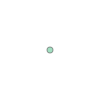

In [30]:
fgdf.geometry.values[0]

In [31]:
import rasterio

In [32]:
print(fgdf.crs)

None


<AxesSubplot:>

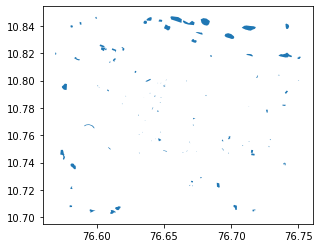

In [33]:
shp_ds.plot()

In [34]:
raster=rasterio.open(ras_path)

In [35]:
raster

<open DatasetReader name='C:/Summer2022/Marginal-Land-Classification/Palakkad_Supervised_Landsat/Data_Preprocessing/New_Palakkad_Raster.tif' mode='r'>

In [36]:
#Get number of bands in raster
rp=gdal.Open(ras_path)
n_band=rp.RasterCount

In [37]:
#Extract x,y from point geometry
co=0
for c in fgdf['geometry']:
    print(c.xy[0][0],c.xy[1][0])
    co+=1
print(co)

76.64307164300004 10.788226620000046
76.64277901900005 10.78838195000003
76.64298855100003 10.788809429000025
76.64307477100004 10.788927469000043
76.64321036300004 10.788880423000023
76.64330357200004 10.789071259000025
76.64374929400003 10.78888747800005
76.64359554700007 10.788507878000075
76.64339916200004 10.788449721000063
76.64336300100007 10.78835177700006
76.64333494800007 10.78816123100006
76.64307164300004 10.788226620000046
76.64757021700007 10.787596412000028
76.64761787800006 10.787977845000057
76.64809534300008 10.787880577000067
76.64799121700008 10.787514773000055
76.64757021700007 10.787596412000028
76.64098446600008 10.779067832000067
76.64117111600007 10.779122803000064
76.64116364900008 10.779173546000038
76.64114077500005 10.779369620000068
76.64123790400004 10.77935419000005
76.64133920900008 10.779279942000073
76.64136165900004 10.779142488000048
76.64147501500008 10.77897488700006
76.64107573700005 10.778806086000031
76.64098446600008 10.779067832000067
76.6452

76.61312526000006 10.813836128000048
76.61300038600007 10.813919860000055
76.61284568600007 10.81388563400003
76.61195209800007 10.81471246500007
76.60929561200004 10.813287135000053
76.60982003500004 10.814102587000036
76.61029245100008 10.813683039000068
76.60975686400008 10.81283544400003
76.60929561200004 10.813287135000053
76.60026302700004 10.796281656000076
76.60040040900003 10.796478798000066
76.60068283700008 10.796386754000025
76.60076641000006 10.79628537900004
76.60107959000004 10.796193044000063
76.60102361300005 10.795912692000059
76.60101634800003 10.79583225700003
76.60058990900006 10.795933933000072
76.60047749400007 10.796018901000025
76.60046850000003 10.796205623000048
76.60026302700004 10.796281656000076
76.60157163600007 10.795312455000044
76.60166267500006 10.795307464000075
76.60204901000003 10.795128445000046
76.60200716500003 10.79496275300005
76.60179968900007 10.794983265000042
76.60158536200004 10.795031825000024
76.60152523600004 10.795150958000022
76.6015

76.57523717900006 10.744106498000065
76.57504255800006 10.744690647000027
76.57497220800008 10.745264090000035
76.57432749600008 10.745641996000074
76.57417388800008 10.794736521000061
76.57404220200004 10.79568424300004
76.57504260200005 10.796484270000064
76.57629624900005 10.797799614000041
76.57783178400007 10.797453499000028
76.57766089900008 10.794019227000035
76.57747690600007 10.793068309000034
76.57556063000004 10.793345177000049
76.57417388800008 10.794736521000061
76.58746386300004 10.840991239000061
76.58722024500008 10.842908828000077
76.58849765700006 10.842547397000033
76.58861531700006 10.840806661000045
76.58746386300004 10.840991239000061
76.61841867700008 10.823986426000033
76.61841023700003 10.82420705100003
76.61927622200005 10.824414233000027
76.62064672000008 10.823218557000075
76.62013341900007 10.821814661000076
76.61900693900003 10.822125285000027
76.61928916100004 10.823601179000036
76.61841867700008 10.823986426000033
76.64595268000005 10.756851852000068
76.

76.73979717600008 10.739321274000076
76.73993290300007 10.73939419900006
76.73993917500007 10.739407031000042
76.73996791600007 10.73975222000007
76.74003038500007 10.739809244000071
76.74005888600004 10.739813390000052
76.74022336200005 10.73980640700006
76.74023764700007 10.739805706000027
76.74036493100004 10.739688960000024
76.74042243200006 10.739537404000032
76.74042563700004 10.73952091600006
76.74043228700003 10.739504441000065
76.74050805400003 10.739228108000077
76.74051109800007 10.739216440000064
76.74051413400008 10.739204802000074
76.74053791800003 10.738912162000076
76.74054050000007 10.738896190000048
76.74053985700004 10.738880251000069
76.74051516100008 10.738706584000056
76.74051162600006 10.738690095000038
76.74051122500003 10.738673638000023
76.74051099100006 10.738663832000043
76.74047360700007 10.738389378000022
76.74043089500003 10.738053061000073
76.74026503700003 10.738046267000072
76.74009946300004 10.738048333000052
76.74007914300006 10.738048239000022
76.73

In [38]:
#Adding new columns to fgdf according to band number
for i in range(n_band):
    nc=str(i+1)
    fgdf['band'+nc]=np.nan
fgdf

,Name,Shape_Leng,Shape_Area,geometry,band1,band2,band3,band4,band5,band6
0,St1,0.002974,0.0,POINT (76.64307 10.78823),NaN,NaN,NaN,NaN,NaN,NaN
1,St1,0.002974,0.0,POINT (76.64278 10.78838),NaN,NaN,NaN,NaN,NaN,NaN
2,St1,0.002974,0.0,POINT (76.64299 10.78881),NaN,NaN,NaN,NaN,NaN,NaN
3,St1,0.002974,0.0,POINT (76.64307 10.78893),NaN,NaN,NaN,NaN,NaN,NaN
4,St1,0.002974,0.0,POINT (76.64321 10.78888),NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
85,Vg20,0.008492,0.000002,POINT (76.74027 10.73805),NaN,NaN,NaN,NaN,NaN,NaN
86,Vg20,0.008492,0.000002,POINT (76.74010 10.73805),NaN,NaN,NaN,NaN,NaN,NaN
87,Vg20,0.008492,0.000002,POINT (76.74008 10.73805),NaN,NaN,NaN,NaN,NaN,NaN
88,Vg20,0.008492,0.000002,POINT (76.73993 10.73812),NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
col_list=[]
for i in range(n_band):
    nc=str(i+1)
    col_list.append('band'+nc)
col_list

['band1', 'band2', 'band3', 'band4', 'band5', 'band6']

In [40]:
#Creating new dataframe for band values
band_df=gpd.GeoDataFrame(columns=col_list)

In [41]:
#Extract Raster Bnad value for point
thco=0
for coordinate in fgdf['geometry']:
    x=coordinate.xy[0][0]
    y=coordinate.xy[1][0]
    r,c=raster.index(x,y)
    val_list=[]
    for i in range(n_band):
        val_list.append(raster.read(i+1)[r,c])
        if len(val_list)==n_band:
            band_df.loc[len(band_df)] = val_list
band_df

,band1,band2,band3,band4,band5,band6
0,654.013916,858.013916,944.013916,2036.513916,2422.013916,2185.013916
1,609.496826,835.496826,869.996826,2122.496826,2043.496826,1787.996826
2,734.508606,1019.008606,1162.008545,2219.008545,2567.508545,2153.508545
3,734.508606,1019.008606,1162.008545,2219.008545,2567.508545,2153.508545
4,845.011780,1124.011841,1210.511841,2114.011719,2666.511719,2429.011719
...,...,...,...,...,...,...
1669,209.316925,447.316925,301.316925,2531.816895,1003.316956,422.316925
1670,244.871002,498.371002,386.871002,2515.871094,1264.370972,606.371033
1671,244.871002,498.371002,386.871002,2515.871094,1264.370972,606.371033
1672,244.871002,498.371002,386.871002,2515.871094,1264.370972,606.371033


In [42]:
fgdf=fgdf.drop(col_list, axis = 1)

In [43]:
fgdf

,Name,Shape_Leng,Shape_Area,geometry
0,St1,0.002974,0.0,POINT (76.64307 10.78823)
1,St1,0.002974,0.0,POINT (76.64278 10.78838)
2,St1,0.002974,0.0,POINT (76.64299 10.78881)
3,St1,0.002974,0.0,POINT (76.64307 10.78893)
4,St1,0.002974,0.0,POINT (76.64321 10.78888)
...,...,...,...,...
85,Vg20,0.008492,0.000002,POINT (76.74027 10.73805)
86,Vg20,0.008492,0.000002,POINT (76.74010 10.73805)
87,Vg20,0.008492,0.000002,POINT (76.74008 10.73805)
88,Vg20,0.008492,0.000002,POINT (76.73993 10.73812)


In [44]:
fgdf.reset_index(inplace=True, drop=True)
band_df.reset_index(inplace=True, drop=True)
final_train_df=pd.concat([fgdf,band_df],axis=1)
final_train_df

,Name,Shape_Leng,Shape_Area,geometry,band1,band2,band3,band4,band5,band6
0,St1,0.002974,0.0,POINT (76.64307 10.78823),654.013916,858.013916,944.013916,2036.513916,2422.013916,2185.013916
1,St1,0.002974,0.0,POINT (76.64278 10.78838),609.496826,835.496826,869.996826,2122.496826,2043.496826,1787.996826
2,St1,0.002974,0.0,POINT (76.64299 10.78881),734.508606,1019.008606,1162.008545,2219.008545,2567.508545,2153.508545
3,St1,0.002974,0.0,POINT (76.64307 10.78893),734.508606,1019.008606,1162.008545,2219.008545,2567.508545,2153.508545
4,St1,0.002974,0.0,POINT (76.64321 10.78888),845.011780,1124.011841,1210.511841,2114.011719,2666.511719,2429.011719
...,...,...,...,...,...,...,...,...,...,...
1669,Vg20,0.008492,0.000002,POINT (76.74027 10.73805),209.316925,447.316925,301.316925,2531.816895,1003.316956,422.316925
1670,Vg20,0.008492,0.000002,POINT (76.74010 10.73805),244.871002,498.371002,386.871002,2515.871094,1264.370972,606.371033
1671,Vg20,0.008492,0.000002,POINT (76.74008 10.73805),244.871002,498.371002,386.871002,2515.871094,1264.370972,606.371033
1672,Vg20,0.008492,0.000002,POINT (76.73993 10.73812),244.871002,498.371002,386.871002,2515.871094,1264.370972,606.371033


In [45]:
file_name = 'Palakkad_Training_Dataset.xlsx'
final_train_df.to_excel(file_name)

In [46]:
fgdf.head()

,Name,Shape_Leng,Shape_Area,geometry
0,St1,0.002974,0.0,POINT (76.64307 10.78823)
1,St1,0.002974,0.0,POINT (76.64278 10.78838)
2,St1,0.002974,0.0,POINT (76.64299 10.78881)
3,St1,0.002974,0.0,POINT (76.64307 10.78893)
4,St1,0.002974,0.0,POINT (76.64321 10.78888)


In [47]:
for i in range(len(fgdf['Name'])):
    fgdf['Name'][i]=fgdf['Name'][i][0]+fgdf['Name'][i][1]
fgdf.head()

C:\Users\Student\AppData\Local\Temp\ipykernel_11724\558883595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fgdf['Name'][i]=fgdf['Name'][i][0]+fgdf['Name'][i][1]


,Name,Shape_Leng,Shape_Area,geometry
0,St,0.002974,0.0,POINT (76.64307 10.78823)
1,St,0.002974,0.0,POINT (76.64278 10.78838)
2,St,0.002974,0.0,POINT (76.64299 10.78881)
3,St,0.002974,0.0,POINT (76.64307 10.78893)
4,St,0.002974,0.0,POINT (76.64321 10.78888)


In [48]:
fgdf.to_file(filename='pointpalakkad.shp', driver='ESRI Shapefile')

C:\Users\Student\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
